In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysispositivenegative/Dataset 2.csv


In [57]:
import tensorflow as tf
# tf.__version__
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot




In [58]:
test_data =pd.read_csv('../input/sentiment-analysispositivenegative/Dataset 2.csv')
test_data=test_data.dropna()
test_data.head()
test_data.iloc[9105]

text        its post iw depression hours
polarity                               1
Name: 9105, dtype: object

In [59]:
test_data['Num_words_text'] = test_data['text'].apply(lambda x:len(str(x).split())) 
mask = test_data['Num_words_text'] >2
test_data = test_data[mask]
# print(test_data)
max_train_sentence_length  = test_data['Num_words_text'].max()
print("MAX Word Count: ",max_train_sentence_length)
test_data.head()


MAX Word Count:  69


,text,polarity,Num_words_text
0,just had a real good moment. i missssssssss hi...,0,11
1,is reading manga http://plurk.com/p/mzp1e,0,4
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,4
3,@lapcat Need to send 'em to my accountant tomo...,0,22
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,5


In [60]:
# X=test_data.drop('polarity',axis=1)
# X=test_data['text']


In [61]:
# Y=test_data['polarity']

In [62]:
# train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split()))


In [63]:
import re
import string




# from nltk.corpus import stopwords
# stoplist = stopwords.words('english')
# stoplist.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
#               'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','¦','Â','€','¢','Ã'])
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string

def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct


# def removeStopWords(tokens): 
#     return [word for word in tokens if word not in stoplist]


In [64]:
test_data['text'] = test_data['text'].apply(lambda x:remove_emoji(x))
# print(test_data.iloc[9105])
test_data['text'] = test_data['text'].apply(lambda x :remove_url(x))
test_data['Text_Clean'] = test_data['text'].apply(lambda x: remove_punct(x))
# test_data['Text_lematized'] = test_data['text'].apply(lambda x: removeStopWords(x))


In [65]:
test_data.head()
# test_data.iloc[3][2]

,text,polarity,Num_words_text,Text_Clean
0,just had a real good moment. i missssssssss hi...,0,11,just had a real good moment i missssssssss him...
1,is reading manga,0,4,is reading manga
2,@comeagainjen -,0,4,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,0,22,lapcat Need to send em to my accountant tomorr...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,5,ADD ME ON MYSPACE myspacecomLookThunder


In [66]:
# import re
# import string
# def remove_punct(text):
#     text_nopunct = ''
#     text_nopunct = re.sub('['+string.punctuation+']', '', text)
#     return text_nopunct
# test_data['Text_Clean'] = test_data['text'].apply(lambda x: remove_punct(x))

In [67]:
from nltk import word_tokenize
tokens = [word_tokenize(sen) for sen in test_data.Text_Clean]
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

# print(lower_tokens)

In [68]:
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stoplist = stopwords.words('english')
corpus=[]
stoplist.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','¦','Â','€','¢','Ã','xa0â'])
wn = nltk.WordNetLemmatizer()
def removeStopWords(tokens): 
    return [wn.lemmatize(stemmer.stem(word)) for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lower_tokens]

test_data['Text_Final'] = [' '.join(sen) for sen in filtered_words]

test_data['tokens'] = filtered_words


# print(pd.DataFrame(wn.lemmatize(word) for word in filtered_words[0]))
for i in range (len(filtered_words)):
    review=''
    for j in range (len(filtered_words[i])):
        review=' '.join(filtered_words[j])
#         review=' '.join(j)
#     print(review)
    corpus.append(review)
    
print(filtered_words[0])
# corpus

# def lemmatizer(text):
#     text = [wn.lemmatize(word) for word in text]
#     return text

['real', 'good', 'moment', 'miss', 'much']


In [69]:
test_data.head(10)

,text,polarity,Num_words_text,Text_Clean,Text_Final,tokens
0,just had a real good moment. i missssssssss hi...,0,11,just had a real good moment i missssssssss him...,real good moment miss much,"[real, good, moment, miss, much]"
1,is reading manga,0,4,is reading manga,read manga,"[read, manga]"
2,@comeagainjen -,0,4,comeagainjen,comeagainjen,[comeagainjen]
3,@lapcat Need to send 'em to my accountant tomo...,0,22,lapcat Need to send em to my accountant tomorr...,lapcat need send em account tomorrow odd wasnt...,"[lapcat, need, send, em, account, tomorrow, od..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,5,ADD ME ON MYSPACE myspacecomLookThunder,add myspac myspacecomlookthund,"[add, myspac, myspacecomlookthund]"
5,so sleepy. good times tonight though,0,6,so sleepy good times tonight though,sleepi good time tonight though,"[sleepi, good, time, tonight, though]"
6,"@SilkCharm re: #nbn as someone already said, d...",0,21,SilkCharm re nbn as someone already said does ...,silkcharm nbn someon alreadi said fiber home m...,"[silkcharm, nbn, someon, alreadi, said, fiber,..."
7,23 or 24ï¿½C possible today. Nice,0,6,23 or 24ï¿½C possible today Nice,23 24ï¿½c possibl today nice,"[23, 24ï¿½c, possibl, today, nice]"
8,nite twitterville workout in the am -ciao,0,7,nite twitterville workout in the am ciao,nite twittervill workout ciao,"[nite, twittervill, workout, ciao]"
9,"@daNanner Night, darlin'! Sweet dreams to you",0,7,daNanner Night darlin Sweet dreams to you,danann night darlin sweet dream,"[danann, night, darlin, sweet, dream]"


In [70]:
voc_size=10000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[0]


[5958, 7146, 3784]

In [71]:
sent_length=max_train_sentence_length
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs[0])


[5958 7146 3784    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [72]:

## Creating model
embedding_vector_features=400
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPool1D(2,2))

model.add(Conv1D(32,3,activation='relu'))
# model.add(MaxPool1D(2,2))
model.add(tf.keras.layers.GlobalMaxPooling1D())
# model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 69, 400)           4000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 67, 64)            76864     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 33, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 31, 32)            6176      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,083,073
Trainable params: 4,083,073
Non-trainable params: 0
____________________________________________

In [73]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(test_data['polarity']).astype("int32")
y_final.dtype

dtype('int32')

In [74]:
# y_final.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [75]:
# model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
127/127 [==============================] - 5s 39ms/step - loss: 0.5019 - accuracy: 0.7864 - val_loss: 0.4481 - val_accuracy: 0.8265
Epoch 2/20
127/127 [==============================] - 5s 37ms/step - loss: 0.4390 - accuracy: 0.8297 - val_loss: 0.4437 - val_accuracy: 0.8295
Epoch 3/20
127/127 [==============================] - 5s 41ms/step - loss: 0.4431 - accuracy: 0.8280 - val_loss: 0.4380 - val_accuracy: 0.8275
Epoch 4/20
127/127 [==============================] - 5s 37ms/step - loss: 0.4306 - accuracy: 0.8353 - val_loss: 0.4462 - val_accuracy: 0.8275
Epoch 5/20
127/127 [==============================] - 5s 36ms/step - loss: 0.4201 - accuracy: 0.8389 - val_loss: 0.4386 - val_accuracy: 0.8275
Epoch 6/20
127/127 [==============================] - 5s 40ms/step - loss: 0.4241 - accuracy: 0.8403 - val_loss: 0.4391 - val_accuracy: 0.8300
Epoch 7/20
127/127 [==============================] - 5s 39ms/step - loss: 0.4233 - accuracy: 0.8369 - val_loss: 0.4422 - val_accuracy: 0.8275

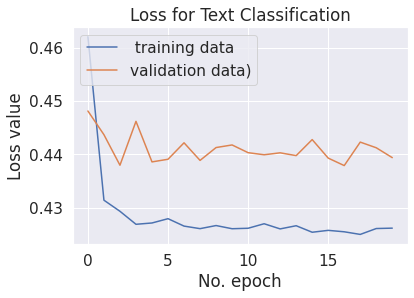

In [77]:

plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# y_pred=(model.predict(X_test) > 0.5).astype("int64")
y_pred=model.predict_classes(X_test) 
pred=[]
# for i in range(0,len(y_pred)):
#     m=np.argmax(y_pred[i])
#     pred.append(m)
conf=confusion_matrix(y_test,y_pred,normalize='true')
# for k in range (0,len(pred)):
#     if pred[k]==1:
#         print(k)
# y_pred[0]
conf.shape

(2, 2)

array([[0.99164524, 0.00835476],
       [0.70877944, 0.29122056]])

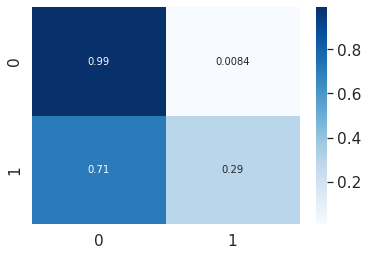

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn


sn.heatmap(conf, cmap="Blues", annot=True)# font size
conf

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1556
           1       0.91      0.29      0.44       467

    accuracy                           0.83      2023
   macro avg       0.87      0.64      0.67      2023
weighted avg       0.84      0.83      0.79      2023



In [ ]:
print(X_test[0])

# END OF CODE


In [ ]:
X_test[0]
txt='Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÃ‚Â'


txt = remove_emoji(txt)
print(":::::After removing Emoiji::::\n",txt)
# print(test_data.iloc[9105])
txt =remove_url(txt)
print(":::::After removing URL:::::\n",txt)
txt= remove_punct(txt)
print(":::::After removing Punc::::\n",txt)
filtered_words = [removeStopWords(sen) for sen in lower_tokens]


In [ ]:
from nltk import word_tokenize
tokens = word_tokenize(txt)
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]
tokens
# lower_tokens

In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stoplist = stopwords.words('english')
corpus=[]
stoplist.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','¦','Â','€','¢','Ã','xa0â'])
wn = nltk.WordNetLemmatizer()
def removeStopWords(tokens): 
    return wn.lemmatize(stemmer.stem(tokens))
filtered_words = [removeStopWords(sen) for sen in tokens]
filtered_words


In [ ]:
corpus1=[]
review=''
for i in range (len(filtered_words)):
    print(filtered_words[i])
    review=' '.join(filtered_words[i])
    print('review__',review)
#     print(review)
    corpus1.append(review)

# tokens[0]
corpus1
# review

In [ ]:
voc_size=10000
onehot_repr=[one_hot(words,voc_size)for words in filtered_words] 
onehot_repr

In [ ]:
sent_length=69
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)